# Seminar 1

## Numpy

Numpy - library for working with N-dimensional arrays

documentation - https://numpy.org/doc/

Why use numpy? Why not just Python `list`?

*   Convenience: numpy is designed for working with numerical arrays (python lists can contain anything)
*   Functionality: a great variety of functions, which are not available in pure Python. F. e. linear algebra, mathematical functions.
*   Better performance: the core of numpy is well-optimized C code, so it is much faster than Python.




### Example

We want to calculate matrix product of 2 matrices.

In [151]:
#Some matrices
A = []
B = []
n = 300
for i in range(n):
    A.append(list(range(i, n+i)))
    B.append(list(range(i+9, n+i+9)))

In [152]:
len(A), len(A[0])

(300, 300)

Let's use pure Python and measure time:

In [153]:
%%time

C = []
#rows of A
for i in range(len(A)):
   #columns if B
   res_i = []
   for j in range(len(B[0])):
       #elements of row/column
       res_i_j = 0
       for k in range(len(B)):
           res_i_j += A[i][k] * B[k][j]
       res_i.append(res_i_j)
   C.append(res_i)

CPU times: user 2.87 s, sys: 8.52 ms, total: 2.88 s
Wall time: 2.88 s


It took $\sim 10$ seconds

Let's try numpy

In [154]:
import numpy as np

#convert lists to arrays
A_ = np.array(A)
B_ = np.array(B)

In [155]:
%%time
C_ = A_.dot(B_)

CPU times: user 27 ms, sys: 2.19 ms, total: 29.2 ms
Wall time: 27.1 ms


It took only $\sim 30$  milliseconds

In [156]:
10000 / 30

333.3333333333333

The numpy code was $\sim 333$ times faster. Also, we had to write only one line of code.

### Numpy basics

Usually, library is imported with the name `np`

In [157]:
import numpy as np

Quoting [documentation](https://numpy.org/devdocs/user/quickstart.html):
> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

ndarray (n-dimensional array) can be created from python list

In [162]:
l = [1,2,3]
a1 = np.array(l)
a1

array([1, 2, 3])

In [163]:
l = [[1,2,3], [2,4,6]]
a2 = np.array(l)
a2

array([[1, 2, 3],
       [2, 4, 6]])

In [164]:
l = [[[1,2,3], [2,4,6]], [[10,20,30], [20,40,60]]]
a3 = np.array(l)
a3

array([[[ 1,  2,  3],
        [ 2,  4,  6]],

       [[10, 20, 30],
        [20, 40, 60]]])

It is possible to create 1D, 2D, 3D, ... arrays. The information about dimensions is saved:

In [165]:
#we have 2 rows, 3 columns - stored in shape attribute
a2.shape

(2, 3)

In [166]:
#To check dimension 0
len(a2)

2

In [167]:
#number of dimensions
a2.ndim

2

All elements have the same type

In [168]:
a2.dtype

dtype('int64')

It is also possible to create arrays, filled with 0 or 1

In [169]:
#only zeros in 2D matrix - 4 rows, 2 columns
np.zeros((4, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [170]:
np.ones((2,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

or with random numbers

In [171]:
#rand - uniform [0, 1)
r = np.random.rand(3,5)
r

array([[0.75470079, 0.85822647, 0.98310407, 0.86397865, 0.68291661],
       [0.27461087, 0.31144989, 0.79017534, 0.41436922, 0.8498012 ],
       [0.47088916, 0.66571473, 0.95560475, 0.21228687, 0.28849463]])

Random means we will get different results if we run the same code again. This may not always be good - the experiments may become irreproducible.

It is a good idea to fix the random - set `seed`:

In [173]:
np.random.seed(0)

r = np.random.rand(3,5)

r

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606]])

### Functions

Some basic functions for statistics:

In [175]:
np.min(r), np.mean(r), np.max(r), np.sum(r)

(0.07103605819788694,
 0.6028640032376982,
 0.9636627605010293,
 9.042960048565472)

Each function returns one number - minimum/average/maximum/sum of the array.

However, we often need to compute the statistic for every row/column. For example, rows represent students and columns - assignments. We want to find average grade for the assignment or the sum of grades for every student.

There is an optional argument, called `axis`:

In [176]:
#average for every column
np.mean(r, axis=0)

array([0.66214422, 0.56055717, 0.68752698, 0.81138086, 0.29271079])

In [177]:
#Сsum for every row
np.sum(r, axis=1)

array([2.83530423, 3.3223586 , 2.88529722])

### Indexing

Rows:

In [178]:
#Row with index 0
r[0]

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [179]:
#Slice of rows
r[0:2]

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152]])

In [180]:
r

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606]])

Columns:

In [185]:
#column with index 1
r[:,1]

array([0.71518937, 0.43758721, 0.52889492])

In [186]:
#slice
r[:,1:3]

array([[0.71518937, 0.60276338],
       [0.43758721, 0.891773  ],
       [0.52889492, 0.56804456]])

Particular element:

In [183]:
r[0,0], r[0][0]

(0.5488135039273248, 0.5488135039273248)

Combinations:

In [184]:
r[1:3, 2:4]

array([[0.891773  , 0.96366276],
       [0.56804456, 0.92559664]])

In [187]:
r

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606]])

In [188]:
#bool array (True - if element > 0.5)
r > 0.5

array([[ True,  True,  True,  True, False],
       [ True, False,  True,  True, False],
       [ True,  True,  True,  True, False]])

In [189]:
#can choose the elements
r[r > 0.5]

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.64589411,
       0.891773  , 0.96366276, 0.79172504, 0.52889492, 0.56804456,
       0.92559664])

Important: we get access here, too

In [190]:
r[r > 0.5] = -0.5

r

array([[-0.5       , -0.5       , -0.5       , -0.5       ,  0.4236548 ],
       [-0.5       ,  0.43758721, -0.5       , -0.5       ,  0.38344152],
       [-0.5       , -0.5       , -0.5       , -0.5       ,  0.07103606]])

### Arithmetic operations

Basic operations are elementwise:

In [191]:
r + 1

array([[0.5       , 0.5       , 0.5       , 0.5       , 1.4236548 ],
       [0.5       , 1.43758721, 0.5       , 0.5       , 1.38344152],
       [0.5       , 0.5       , 0.5       , 0.5       , 1.07103606]])

In [192]:
r * 2

array([[-1.        , -1.        , -1.        , -1.        ,  0.8473096 ],
       [-1.        ,  0.87517442, -1.        , -1.        ,  0.76688304],
       [-1.        , -1.        , -1.        , -1.        ,  0.14207212]])

In [193]:
#we also can divide by zero, but we will get warning
r / 0

/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_41648/1938145771.py:2: RuntimeWarning: divide by zero encountered in divide
  r / 0


array([[-inf, -inf, -inf, -inf,  inf],
       [-inf,  inf, -inf, -inf,  inf],
       [-inf, -inf, -inf, -inf,  inf]])

`nan` - not a number, this element can not be represented with number (0/0 is undefined)

`inf` - infinity, the number is too big for numpy

In [194]:
np.nan -  np.nan

nan

In [195]:
np.inf - np.inf

nan

In [196]:
np.nan +  np.nan

nan

Usually, `nan` is a bad thing to have in an array.

In [197]:
np.sin(r)

array([[-0.47942554, -0.47942554, -0.47942554, -0.47942554,  0.41109488],
       [-0.47942554,  0.42375525, -0.47942554, -0.47942554,  0.37411428],
       [-0.47942554, -0.47942554, -0.47942554, -0.47942554,  0.07097633]])

In [198]:
np.abs(r - 1.5)

array([[2.        , 2.        , 2.        , 2.        , 1.0763452 ],
       [2.        , 1.06241279, 2.        , 2.        , 1.11655848],
       [2.        , 2.        , 2.        , 2.        , 1.42896394]])

The power will be elementwise, too

In [199]:
r ** 2

array([[0.25      , 0.25      , 0.25      , 0.25      , 0.17948339],
       [0.25      , 0.19148257, 0.25      , 0.25      , 0.1470274 ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.00504612]])

It is also possible to work with several arrays

In [200]:
np.random.seed(2024)

b = np.random.rand(3, 5)

In [201]:
r + b

array([[ 0.08801452,  0.19910875, -0.31184804, -0.45619144,  0.62867375],
       [-0.39393713,  1.16482735,  0.17940052, -0.0261543 ,  0.83173734],
       [-0.48089305,  0.25259834,  0.10244854,  0.46177758,  0.73540471]])

In [202]:
r / b

array([[ -0.85031914,  -0.71519631,  -2.65742648, -11.41329359,
          2.06641774],
       [ -4.71418489,   0.60170937,  -0.73594291,  -1.05519581,
          0.85533145],
       [-26.16849134,  -0.66436501,  -0.82994641,  -0.51987072,
          0.10692265]])

The arrays should have the same shapes

In [203]:
np.random.seed(2024)

k = np.random.rand(3,9)

#Error here
r + k

ValueError: operands could not be broadcast together with shapes (3,5) (3,9) 

However, arrays can be broadcasted to have fitting shapes.

Two dimensions are compatible when:

*   they are equal, or
*   one of them is 1

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

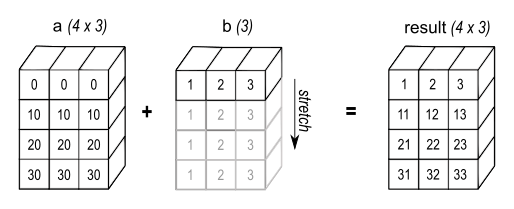

In [204]:
d = np.random.rand(5)

r + d

array([[ 0.0440372 , -0.11729237, -0.11834905, -0.21417261,  1.16392295],
       [ 0.0440372 ,  0.82029484, -0.11834905, -0.21417261,  1.12370967],
       [ 0.0440372 , -0.11729237, -0.11834905, -0.21417261,  0.81130421]])

Matrix product, dimensions should match:

In [205]:
t = np.random.rand(5,4)

#2 ways, work the same
r @ t, r.dot(t)

(array([[-1.05961698, -0.3633761 , -1.19309081, -0.88980975],
        [-0.3343648 ,  0.31333488, -0.80204361, -0.70034956],
        [-1.14985949, -0.66917848, -1.19890477, -1.08463053]]),
 array([[-1.05961698, -0.3633761 , -1.19309081, -0.88980975],
        [-0.3343648 ,  0.31333488, -0.80204361, -0.70034956],
        [-1.14985949, -0.66917848, -1.19890477, -1.08463053]]))

In [206]:
#error, dims do not match
t.dot(r)

ValueError: shapes (5,4) and (3,5) not aligned: 4 (dim 1) != 3 (dim 0)

### More useful things

In [207]:
#transposing
r.T

array([[-0.5       , -0.5       , -0.5       ],
       [-0.5       ,  0.43758721, -0.5       ],
       [-0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       ],
       [ 0.4236548 ,  0.38344152,  0.07103606]])

Numbers generator, similar to `range`

In [208]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

But range cannot have `float` step

In [209]:
#error
range(0, 2, 0.02)

TypeError: 'float' object cannot be interpreted as an integer

and returns generator, not array

In [219]:
list(range(0, 20, 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Tasks

1. Find minimal odd number in the array

In [ ]:
vec = np.array([1,4,5,2,4,-1,24,2,17])

#YOUR CODE

2. Replace all odd numbers with 42

In [ ]:
vec = np.array([1,4,5,2,4,-1,24,2,17])

#YOUR CODE

3. Create array of first `n` even numbers in descending order (like [10, 8, 6, 4, 2])

In [ ]:
n = 5

#YOUR CODE

### Conclusion

Numpy is a  library for fast and convenient work with arrays. If we can use numpy and avoid `for`-loops - we should do it.

## Matplotlib

Matplotlib is a basic library for visualization.

documentation for matplotlib.pyplot - https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

In [232]:
import matplotlib.pyplot as plt

We can draw a basic plot

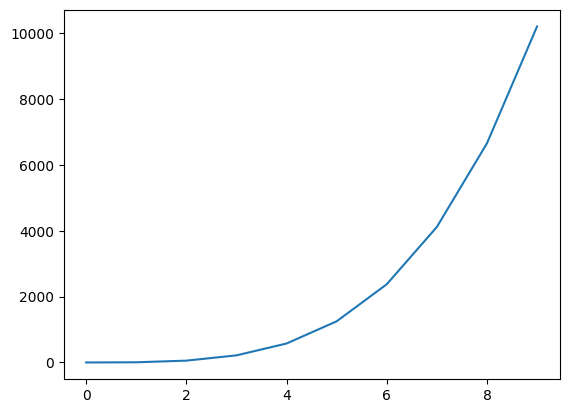

In [233]:
x = np.arange(0, 10, 1)
y = x ** 4 + 5 * x ** 3

plt.plot(x, y)

### Customization

We can also add/change:



*   Color of the line
*   Markers
*   Several lines on one plot
*   Labels
*   Title
*   Axis labels
*   etc.



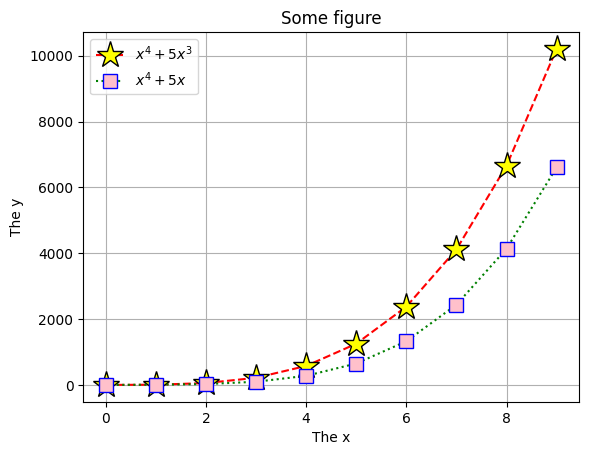

In [235]:
plt.title('Some figure')
plt.plot(x, y,
         color='red', #color of the line
         linestyle='--', #style of the line (dashed)
         label=r'$x^4 + 5x^3$', #label of the line
         marker='*', #marker style (stars)
         mec='black', #edge color of the marker
         mfc='yellow', #inner color of the marker
         ms=20 #size of the marker
         )
plt.plot(x, x ** 4 + 5 * x, color='green', label=r'$x^4 + 5x$', marker='s', mec='blue', mfc='pink',  linestyle=':', ms=10)
plt.xlabel('The x')
plt.ylabel('The y')
plt.grid()
plt.legend()

plt.show()

### Types of plots

Some other types of plots:

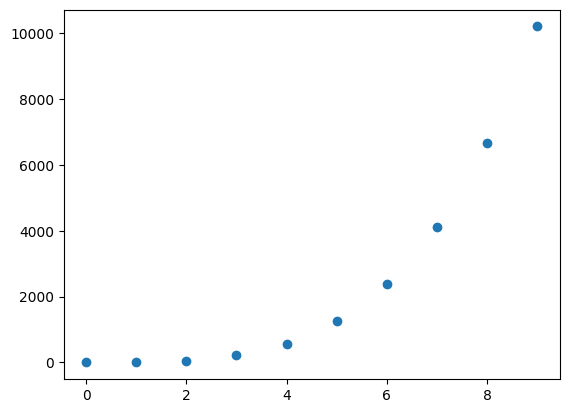

In [236]:
#Points
plt.scatter(x, y)

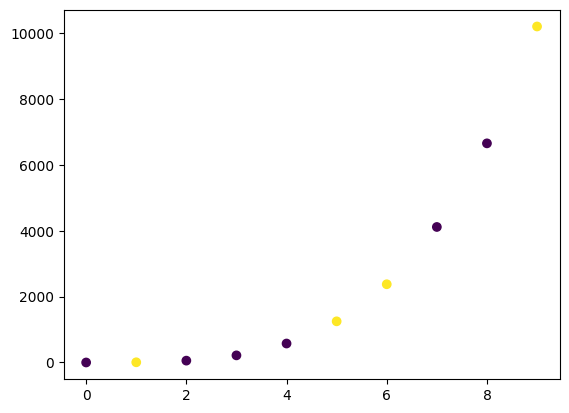

In [239]:
#Each point has a color
c = np.random.randint(2, size=len(x))
plt.scatter(x, y, c=c)

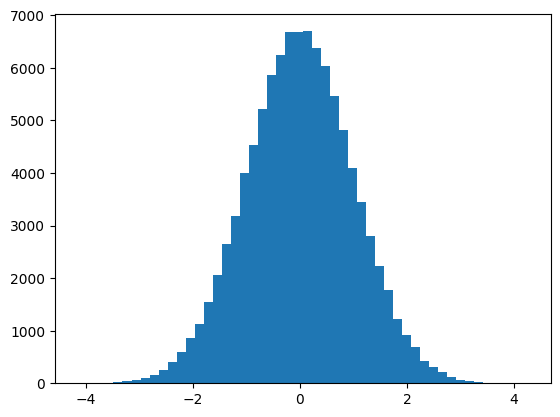

In [251]:
#histograms
t = np.random.normal(size=100000)
plt.hist(t, bins=50)
plt.show()

<BarContainer object of 2 artists>

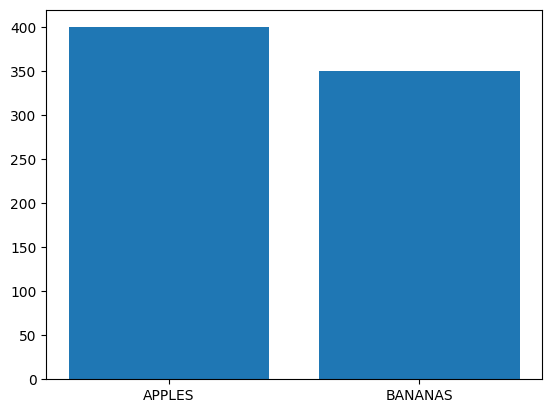

In [252]:
#barplots
x = ["APPLES", "BANANAS"]
y = [400, 350]
plt.bar(x, y)

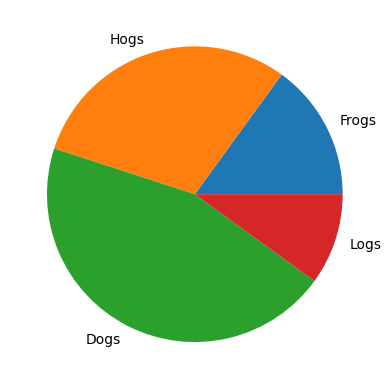

In [253]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels)
plt.show()

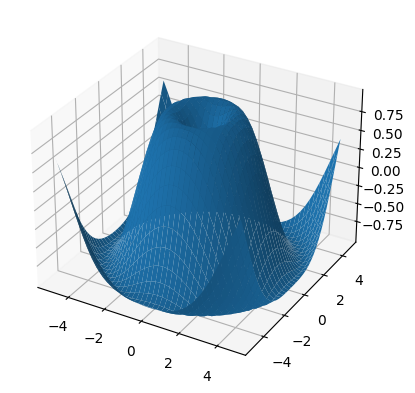

In [254]:
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2)


plt.show()

### Subplots

It is also possible to create several plots near each other

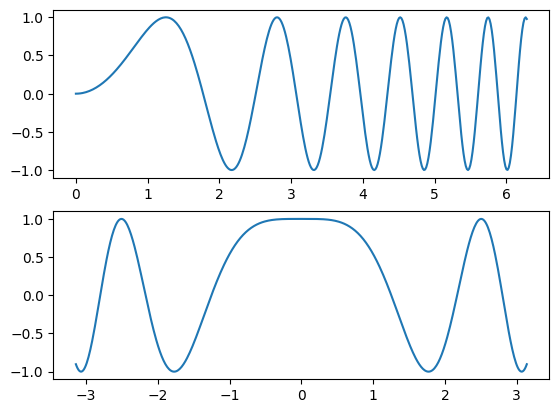

In [255]:
x1 = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x1**2)
x2 = np.linspace(-np.pi, np.pi, 500)
y2 = np.cos(x2**2)

fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(x1, y1)
ax[1].plot(x2, y2)

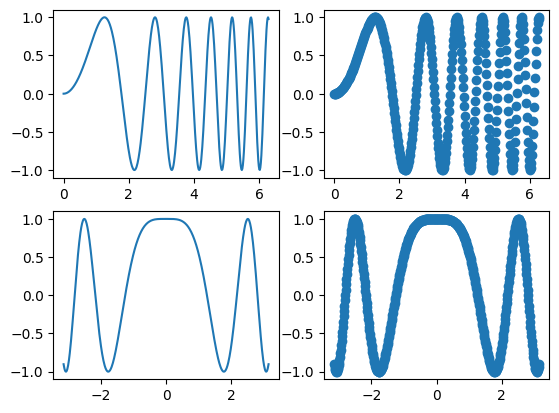

In [256]:
x1 = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x1**2)
x2 = np.linspace(-np.pi, np.pi, 500)
y2 = np.cos(x2**2)

#2 rows, 2 coluns
fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0][0].plot(x1, y1)
ax[1][0].plot(x2, y2)

ax[0][1].scatter(x1, y1)
ax[1][1].scatter(x2, y2)

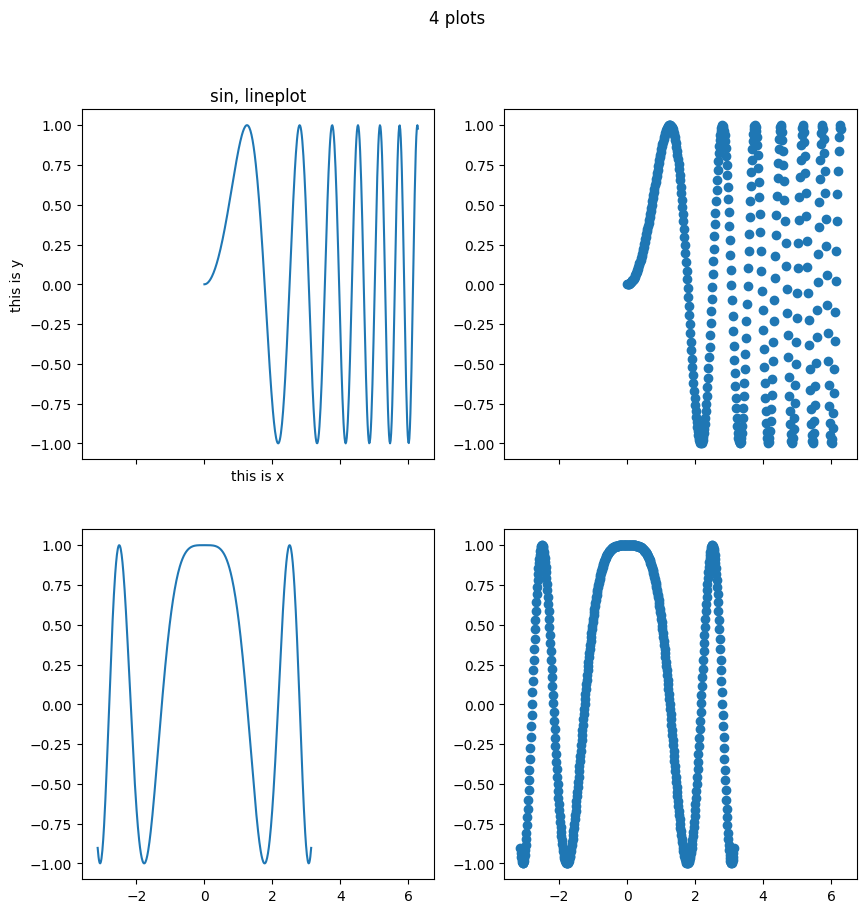

In [257]:
x1 = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x1**2)
x2 = np.linspace(-np.pi, np.pi, 500)
y2 = np.cos(x2**2)

#Here we add sharex=True
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)
fig.suptitle('4 plots')
ax[0][0].plot(x1, y1)
ax[0][0].set_title('sin, lineplot')
ax[0][0].set_xlabel('this is x')
ax[0][0].set_ylabel('this is y')

ax[1][0].plot(x2, y2)

ax[0][1].scatter(x1, y1)
ax[1][1].scatter(x2, y2)

### Conclusion

Matplotlib is a simple library for plots. Many other libraries are the extensions of it. Easy to use, but need to spend time to draw beautiful plots.

## Pandas

Pandas is a  library for working with tables (datasets)

Why use pandas:



*   Convenient table representation
*   A lot of functions for tables (as in Excel)
*   Visualization (embedded + some libraries are design for pandas DataFrames)




Documentation - https://pandas.pydata.org/docs/

Download `train.csv` file from https://www.kaggle.com/c/titanic/data?select=train.csv

In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Opening the dataset

Pandas can read many types of files, for example, `.csv`, `.tsv` and `.xlsx`.

In [260]:
df = pd.read_csv('train.csv')

The table object in pandas is called `DataFrame`:

In [261]:
type(df)

pandas.core.frame.DataFrame

We can look on the first rows:

In [266]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Bold numbers in first column are indices (like in lists and arrays), bold words in first row are column names.

In [263]:
#Last rows
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [267]:
#Random rows
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q


What is this table? Information about passengers on the Titanic. Every row is a passenger.

We need to know, what every column contains:

*  **PassengerId** - The ID of the passenger
*   **Survived** - 	Survival of the passenger;	0 = No, 1 = Yes
* **Pclass**	- Ticket class;	1 = 1st, 2 = 2nd, 3 = 3rd
* **Sex**	- Sex of the passenger
*   **Age** -	Age in years
*   **SibSp**	- Number of siblings / spouses aboard the Titanic
* **Parch**	- Number of parents / children aboard the Titanic
* **Ticket**	- Ticket number
* **Fare**	- Passenger fare
* **Cabin**	- Cabin number
* **Embarked**	- Port of Embarkation;	C = Cherbourg, Q = Queenstown, S = Southampton

We can start by checking the basic information about the DataFrame

In [268]:
#Types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [269]:
df.shape

(891, 12)

In [270]:
#number of rows
len(df)

891

In [273]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Indexing

We can choose columns

In [274]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

The columns are `Series` - 1D array, with index labels.

In [275]:
type(df['Age'])

pandas.core.series.Series

Why index labels matter? Why are they bold in DataFrame and why are they preserved in Series?


Because they are ids of rows/elements and they are not always numbers 0, 1, ...


Let's firstly look on how to choose rows: methods `loc` and `iloc`

In [276]:
#choose row with index = 1
df.loc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [277]:
#choose row, which relative position is 1
df.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

No difference? Let's check the following example:

In [278]:
np.random.seed(0)
sample = df.sample(3)

sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q


The relative position 1 is occupied by Edward (648 index)

In [279]:
sample.iloc[1]

PassengerId                   649
Survived                        0
Pclass                          3
Name           Willey, Mr. Edward
Sex                          male
Age                           NaN
SibSp                           0
Parch                           0
Ticket              S.O./P.P. 751
Fare                         7.55
Cabin                         NaN
Embarked                        S
Name: 648, dtype: object

But there is no index 1, so `loc` will give an error:

In [280]:
#error
sample.loc[1]

KeyError: 1

When we take the column of our sample, the indices are perserved.

In [281]:
sample['Age']

495    NaN
648    NaN
278    7.0
Name: Age, dtype: float64

It is possible to use masks for choosing rows (like in numpy)

In [284]:
#Passengers who paid more than 300
df[df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
#Women who paid more than 300
df[(df['Fare'] > 300) & (df['Sex'] == 'female')]

### Some statistics

In [285]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [286]:
#Correlation
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


It may be important to look into unique values (often categories) of columns.

It is said that there are 3 classes. Is this true?

In [287]:
df['Pclass'].unique()

array([3, 1, 2])

In [288]:
df['Pclass'].nunique()

3

In [289]:
#Count how many passengers were in every class
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

We may assume that people in class 1 paid on average more than people in class 3.

Let's check it:

In [290]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

`groupby` - method chooses rows with same value (1, 2 or 3) of the column (`'Pclass'`) and computes the  function (`mean`) for every same value.

**Task:**

What was the maximum age of male/female passengers?

In [ ]:
#YOUR CODE

### Add/delete columns

In [291]:
df['Random'] = np.random.rand(len(df))
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,0.404774
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,0.922299


There was no `'Random'` column, we have created it (like in python `dict`, just added a new key)

We also can use old columns to create new

In [292]:
df['Fare'] * 2

0       14.5000
1      142.5666
2       15.8500
3      106.2000
4       16.1000
         ...   
886     26.0000
887     60.0000
888     46.9000
889     60.0000
890     15.5000
Name: Fare, Length: 891, dtype: float64

In [293]:
df['Double_Fare'] =  df['Fare'] * 2
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random,Double_Fare
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,0.457059,62.55
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.000,NaN,S,0.208253,0.00


In [294]:
df['Fare_Random'] =  df['Fare'] + df['Random']
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random,Double_Fare,Fare_Random
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,0.675689,22.4834,11.917389
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S,0.506863,31.8000,16.406863


In [295]:
df['Big_Fare'] =  (df['Fare'] > 100).astype('int64')
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random,Double_Fare,Fare_Random,Big_Fare
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,0.556133,40.5,20.806133,0
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.00,NaN,S,0.244570,60.0,30.244570,0


All the new columns were created using math or bool operations. What if we have some more complex function?

For example, we want to have column 'name_length'

In [296]:
len(df['Name'])

891

The code does not compute `len` for every name, but for the Series itself.

To apply function we can use `apply` (or `for`-loop, but it is slow)

In [297]:
df['Name'].apply(len)

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

**Task:**

Every full name contains a title, let's extract it and put into new column.

In [298]:
def extract_title(s):
  #YOUR CODE


df['Title'] = df['Name'].apply(extract_title)

df.sample(5)

IndentationError: expected an indented block after function definition on line 1 (3691635095.py, line 5)

To delete columns/rows we can use `drop` function

In [299]:
df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [300]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random,Double_Fare,Fare_Random,Big_Fare
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,0.524184,35.6000,18.324184,0
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S,0.811939,15.7916,8.707739,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,0.271252,36.0000,18.271252,0


But the columns are still there ...

Important: many functions that change the DataFrame are not inplace, they return a **copy**

In [301]:
new_df = df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])
#change something in new_df
new_df['Age'] = 0
new_df['Parch'] = -12321
new_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,-12321,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,1,-12321,PC 17599,71.2833,C85,C


In [302]:
#initial is untouched
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random,Double_Fare,Fare_Random,Big_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.147809,14.5000,7.397809,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.684934,142.5666,71.968234,0


We need to save the changes (use `inplace=True` or `df = df.drop(...)`)

In [303]:
#df = df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])
df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'], inplace=True)
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.75,NaN,Q
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.00,NaN,S


## Seaborn

Seaborn is a library for visualization, extension of matplotlib

Why use seaborn:



*   Simplier syntax
*   Faster and easier to make beautiful plots (the default versions are alredy ok)
*   Convenient for pandas
*   More complex plots



In [304]:
import seaborn as sns

### Types of plots

<Axes: xlabel='Age', ylabel='Count'>

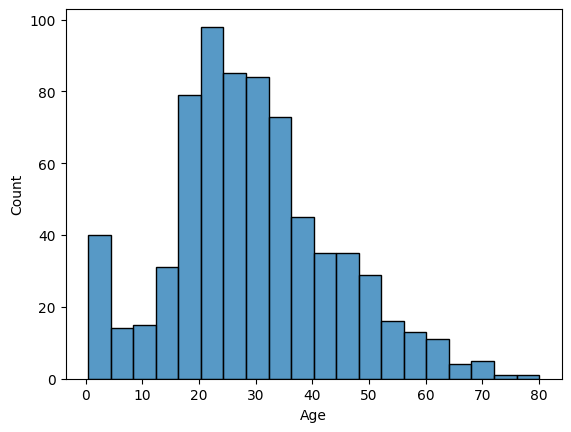

In [305]:
#The histogram
sns.histplot(data=df, x='Age')

<Axes: xlabel='Age', ylabel='Count'>

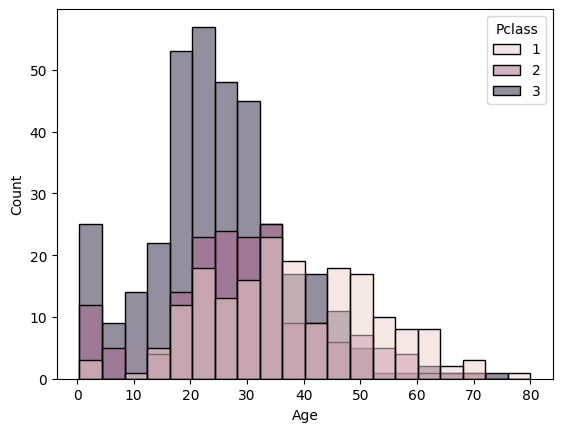

In [306]:
sns.histplot(data=df,
             x='Age',
             hue='Pclass' #different color, bars
             )

If we want to make a similar plot with matplotlib:

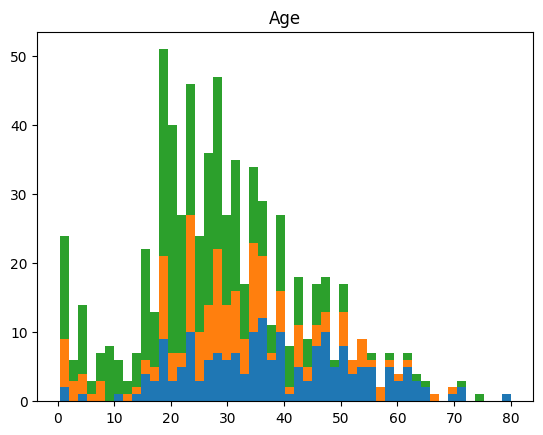

In [310]:
plt.title("Age")
plt.hist(
    [df["Age"][df["Pclass"] == 1],
     df["Age"][df["Pclass"] == 2],
     df["Age"][df["Pclass"] == 3]],
    stacked=True,
    bins=50
);


<Axes: xlabel='Age', ylabel='Fare'>

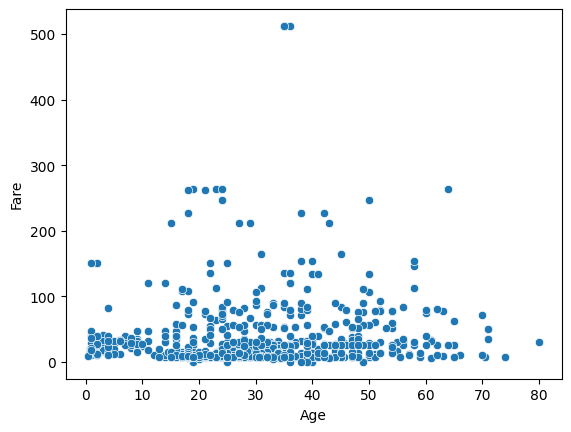

In [308]:
sns.scatterplot(df,
                x='Age',
                y='Fare'
                )

/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


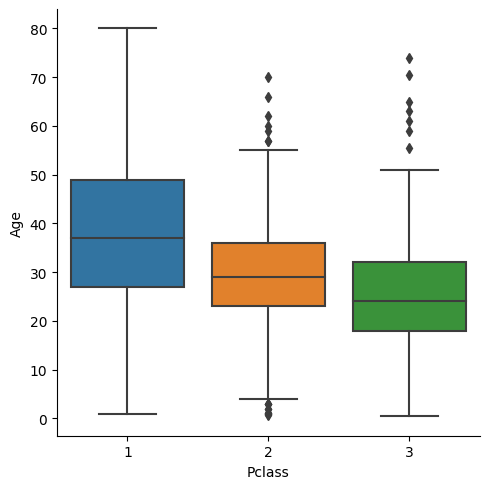

In [309]:
#boxplot
sns.catplot(df, x="Pclass", y="Age",  kind="box")

**Task**

Draw boxplot, where color is Sex, every box is a port of embarkation and the values are the fare.

In [ ]:
#YOUR CODE

### Conclusion

Seaborn is a library for drawing beautiful plots easily.